# Classifying Fashion-MNIST

Now it's your turn to build and train a neural network. You'll be using the [Fashion-MNIST dataset](https://github.com/zalandoresearch/fashion-mnist), a drop-in replacement for the MNIST dataset. MNIST is actually quite trivial with neural networks where you can easily achieve better than 97% accuracy. Fashion-MNIST is a set of 28x28 greyscale images of clothes. It's more complex than MNIST, so it's a better representation of the actual performance of your network, and a better representation of datasets you'll use in the real world.

<img src='assets/fashion-mnist-sprite.png' width=500px>

In this notebook, you'll build your own neural network. For the most part, you could just copy and paste the code from Part 3, but you wouldn't be learning. It's important for you to write the code yourself and get it to work. Feel free to consult the previous notebooks though as you work through this.

First off, let's load the dataset through torchvision.

In [23]:
%matplotlib inline
import torch
import torchvision
from torchvision import datasets, transforms
import helper

import matplotlib.pyplot as plt
import numpy as np
import torchvision.transforms as transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

Here we can see one of the images.

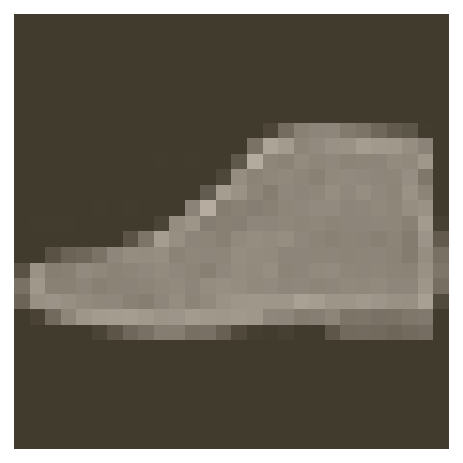

In [24]:

image, label = next(iter(trainloader))
helper.imshow(image[0,:]);


## Building the network

Here you should define your network. As with MNIST, each image is 28x28 which is a total of 784 pixels, and there are 10 classes. You should include at least one hidden layer. We suggest you use ReLU activations for the layers and to return the logits or log-softmax from the forward pass. It's up to you how many layers you add and the size of those layers.

In [25]:
# TODO: Define your network architecture here
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
from torch.nn import Conv2d, Dropout2d, Linear
from torch.nn.functional import relu, softmax

input_dim = 784
num_l1 = 128
num_l2 = 64
out = 10

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()

        # set the fully connected layer:
        self.fc1 = nn.Linear(input_dim,num_l1)
        self.fc2 = nn.Linear(num_l1,num_l2)
        self.fc3 = nn.Linear(num_l2,out)
        

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.softmax(self.fc3(x), dim = 1)

        return x
    

net = Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)


In [26]:
# Define the loss
model = Net()

criterion = nn.CrossEntropyLoss()

# Get our data
dataiter = iter(trainloader)

images, labels = next(dataiter)

# Flatten images
images = images.view(images.shape[0], -1)

# Forward pass, get our logits
logits = model(images)
# Calculate the loss with the logits and the labels
loss = criterion(logits, labels)

print(loss)


tensor(2.3044, grad_fn=<NllLossBackward0>)


# Train the network

Now you should create your network and train it. First you'll want to define [the criterion](http://pytorch.org/docs/master/nn.html#loss-functions) ( something like `nn.CrossEntropyLoss`) and [the optimizer](http://pytorch.org/docs/master/optim.html) (typically `optim.SGD` or `optim.Adam`).

Then write the training code. Remember the training pass is a fairly straightforward process:

* Make a forward pass through the network to get the logits 
* Use the logits to calculate the loss
* Perform a backward pass through the network with `loss.backward()` to calculate the gradients
* Take a step with the optimizer to update the weights

By adjusting the hyperparameters (hidden units, learning rate, etc), you should be able to get the training loss below 0.4.

In [27]:
#set CUDA
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cpu


In [47]:
import torch.optim as optim

model = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.003)

In [48]:
from sklearn.metrics import accuracy_score

num_epoch = 14


for epoch in range(num_epoch):  # loop over the dataset multiple times

    running_loss = 0.0
    model.train()
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data
        inputs = inputs.view(inputs.shape[0], -1)

        # wrap them in Variable

        inputs, labels = Variable(inputs.to(device)), Variable(labels.to(device))
        #inputs, labels = Variable(inputs), Variable(labels)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        output = model(inputs)
        loss = criterion(output, labels)

        loss.backward()
        optimizer.step()

        # print statistics

        running_loss += loss.item()
        if i % 400 == 0:    # print every 400 mini-batches
            print('[epoch %d, batch %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 400))
            print(loss.item())
            running_loss = 0.0

    #net.eval()

print('Finished Training')

[epoch 1, batch     1] loss: 0.006
2.3013432025909424
[epoch 1, batch   401] loss: 2.301
2.2992711067199707
[epoch 1, batch   801] loss: 2.295
2.2923405170440674
[epoch 2, batch     1] loss: 0.006
2.2876594066619873
[epoch 2, batch   401] loss: 2.285
2.2841455936431885
[epoch 2, batch   801] loss: 2.271
2.2729198932647705
[epoch 3, batch     1] loss: 0.006
2.2619528770446777
[epoch 3, batch   401] loss: 2.232
2.2242324352264404
[epoch 3, batch   801] loss: 2.194
2.1930227279663086
[epoch 4, batch     1] loss: 0.005
2.1153504848480225
[epoch 4, batch   401] loss: 2.141
2.0998740196228027
[epoch 4, batch   801] loss: 2.109
2.080066680908203
[epoch 5, batch     1] loss: 0.005
2.052471160888672
[epoch 5, batch   401] loss: 2.066
2.099419116973877
[epoch 5, batch   801] loss: 2.032
2.0331509113311768
[epoch 6, batch     1] loss: 0.005
1.9685438871383667
[epoch 6, batch   401] loss: 1.996
1.984924077987671
[epoch 6, batch   801] loss: 1.967
1.9444962739944458
[epoch 7, batch     1] loss: 0.0

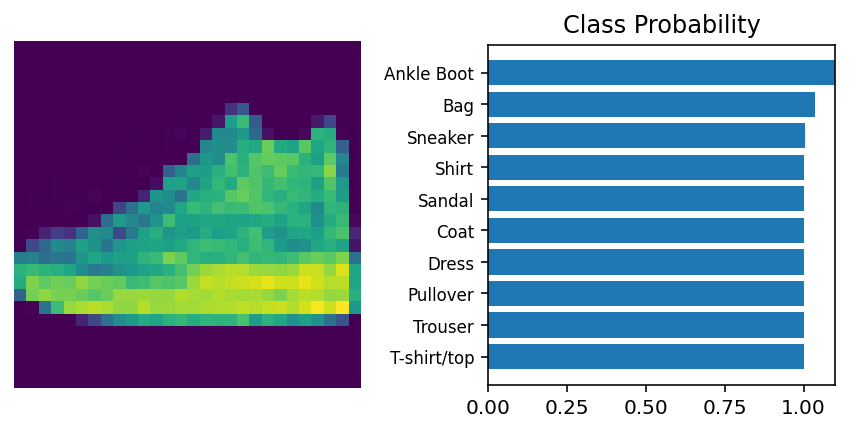

In [51]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import helper

# Test out your network!

dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[0]
# Convert 2D image to 1D vector
img = img.resize_(1, 784)


with torch.no_grad():
    logps = model(img)

# Output of the network are log-probabilities, need to take exponential for probabilities
ps = torch.exp(logps)

# Plot the image and probabilities
helper.view_classify(img.resize_(1, 28, 28), ps, version='Fashion')